Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.

#INSTALLATION

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving A1_standard.csv to A1_standard.csv


In [ ]:
# !pip install pyspellchecker

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import words

In [ ]:
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# import spellchecker
# from spellchecker import SpellChecker

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE

# Import pickle to save and load the model
import pickle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# importing libraries for XGBoost classifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics.pairwise import pairwise_distances

from pprint import pprint

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Load data

In [ ]:
df = pd.read_csv('A1_standard.csv')

In [ ]:
# Check the data types of columns in the DataFrame
print(df.dtypes)

sentence      object
label_text    object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    2758 non-null   object
 1   label_text  2758 non-null   object
dtypes: object(2)
memory usage: 43.2+ KB


In [ ]:
print('Number of missing values across columns: \n',df.isnull().sum())

Number of missing values across columns: 
 sentence      0
label_text    0
dtype: int64


In [ ]:
df.shape

(2758, 2)

#Data Cleaning

In [ ]:
# Getting total number of NULL values and percentage of the columns
null_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage


In [ ]:
df.label_text.value_counts(normalize=True)

neutral     0.593909
positive    0.281363
negative    0.124728
Name: label_text, dtype: float64

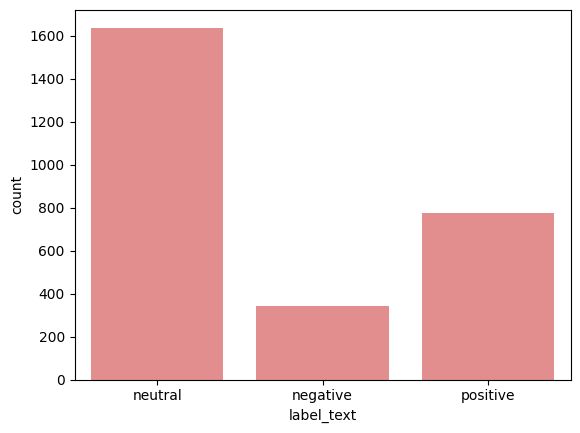

In [ ]:
sns.countplot(x = 'label_text',
              data = df,
              color = 'lightcoral')
plt.show()

#PRE-PROCESSING

Handling punctuations

In [ ]:
# Function to clean the text and remove all the unnecessary elements.
def clean_punctuation(sentence):
    sentence = sentence.lower() # Text to lowercase
    pattern = '[^\w\s]' # Removing punctuation
    sentence = re.sub(pattern, '', sentence)
    return sentence

In [ ]:
df['sentence'] = df['sentence'].apply(clean_punctuation)
df.head()

,sentence,label_text
0,according to gran the company has no plans to...,neutral
1,technopolis plans to develop in stages an area...,neutral
2,the international electronic industry company ...,negative
3,for the last quarter of 2010 componenta s net...,positive
4,in the third quarter of 2010 net sales increa...,positive


Handling stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

{'all', "haven't", 'of', "wouldn't", 'on', 'he', 'each', 'off', "hadn't", 'too', "you're", 'an', 'up', 'out', 'haven', 'but', 'between', 'wasn', 'll', 'them', 'does', "isn't", 'myself', 'their', 'ourselves', 'down', 'shan', 'which', 'same', 'ours', 'while', 'won', 'these', 'by', 'very', 'such', "that'll", "you've", 'to', "hasn't", "needn't", 'o', 'other', 'was', "didn't", 'nor', 'a', 'didn', 'now', 'it', 'had', 'hers', 'about', 'is', "you'd", 'we', 'against', 'during', 'its', 'can', "doesn't", 'y', 'no', 'needn', 'before', 'itself', 'in', 'hasn', "mightn't", 'his', 'once', 'some', 'my', "mustn't", 'm', "aren't", 'have', 'whom', 'did', "it's", 'how', 'over', 'the', 'has', 'our', 'both', 'there', 'aren', 'your', 'few', 'under', 'her', 'weren', 'only', 'couldn', 'him', 'themselves', 're', 'are', 'further', 't', 'i', 'himself', 'do', 'am', 'that', 'more', 'yourselves', 'any', 'so', 'what', 'until', 'yours', "wasn't", 'into', "she's", 'should', 'hadn', 'herself', 'through', 'yourself', 'the

In [ ]:
# Function to remove the stopwords
def clean_stopwords(sentence):
    sentence = sentence.lower() # Text to lowercase
    words = word_tokenize(sentence) # Split sentences into words
    text_nostopwords = " ".join( [each_word for each_word in words if each_word not in stopwords_set] )
    return sentence

In [ ]:
df['sentence'] = df['sentence'].apply(clean_stopwords)
df.head()

,sentence,label_text
0,according to gran the company has no plans to...,neutral
1,technopolis plans to develop in stages an area...,neutral
2,the international electronic industry company ...,negative
3,for the last quarter of 2010 componenta s net...,positive
4,in the third quarter of 2010 net sales increa...,positive


Handling lemmatization

In [ ]:
#Function to lemmatize the text
def clean_lemma(text):
    sentence = []
    doc = nlp(text)
    for token in doc:
        sentence.append(token.lemma_)
    return " ".join(sentence)

In [ ]:
df['sentence_lemmatized'] = df['sentence'].apply(clean_lemma)
df.head()

,sentence,label_text,sentence_lemmatized
0,according to gran the company has no plans to...,neutral,accord to gran the company have no plan to m...
1,technopolis plans to develop in stages an area...,neutral,technopoli plan to develop in stage an area of...
2,the international electronic industry company ...,negative,the international electronic industry company ...
3,for the last quarter of 2010 componenta s net...,positive,for the last quarter of 2010 componenta s ne...
4,in the third quarter of 2010 net sales increa...,positive,in the third quarter of 2010 net sale increa...


spell checking and implement custom functions for handling rare words

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import words

# Download NLTK resources
nltk.download('words')

# Load the DataFrame
# Assuming df is your DataFrame with columns 'Sentence', 'label_text', and 'sentence_lemmatized'

# Function to remove rare words
def remove_rare_words(text):
    # Define a set of common English words
    common_words = set(words.words())

    # Filter out words that are not in the set of common English words
    return ' '.join([word for word in text.split() if word.lower() in common_words])

# Function to perform spell checking
def spell_check(text):
    # Use NLTK's word corpus for spell checking
    english_words = set(words.words())

    # Check each word in the text and correct misspelled words
    corrected_text = []
    for word in text.split():
        if word.lower() not in english_words:
            # If word is not in the English words set, find the most similar word
            closest_word = min(english_words, key=lambda x: nltk.edit_distance(word.lower(), x))
            corrected_text.append(closest_word)
        else:
            corrected_text.append(word)

    return ' '.join(corrected_text)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# Apply the functions to the 'sentence_lemmatized' column
df['sentence_lemmatized'] = df['sentence_lemmatized'].apply(remove_rare_words)
df['sentence_lemmatized'] = df['sentence_lemmatized'].apply(spell_check)

# Print the updated DataFrame
print(df.head())

                                            sentence label_text  \
0  according to gran  the company has no plans to...    neutral   
1  technopolis plans to develop in stages an area...    neutral   
2  the international electronic industry company ...   negative   
3  for the last quarter of 2010  componenta s net...   positive   
4  in the third quarter of 2010  net sales increa...   positive   

                                 sentence_lemmatized  
0  accord to the company have no plan to move all...  
1  plan to develop in stage an area of no less th...  
2  the international electronic industry company ...  
3  for the last quarter of s net sale double to m...  
4  in the third quarter of net sale increase by t...  


Remove words with 1 character

In [ ]:
# Function to remove words with only one character
def remove_single_letter_words(text):
    # Split the text into words and filter out words with length <= 1
    return ' '.join([word for word in text.split() if len(word) > 1])

# Apply the function to remove single-letter words
df['sentence_lemmatized'] = df['sentence_lemmatized'].apply(remove_single_letter_words)
print(df.head())

                                            sentence label_text  \
0  according to gran  the company has no plans to...    neutral   
1  technopolis plans to develop in stages an area...    neutral   
2  the international electronic industry company ...   negative   
3  for the last quarter of 2010  componenta s net...   positive   
4  in the third quarter of 2010  net sales increa...   positive   

                                 sentence_lemmatized  
0  accord to the company have no plan to move all...  
1  plan to develop in stage an area of no less th...  
2  the international electronic industry company ...  
3  for the last quarter of net sale double to fro...  
4  in the third quarter of net sale increase by t...  


Characters distribution => normal

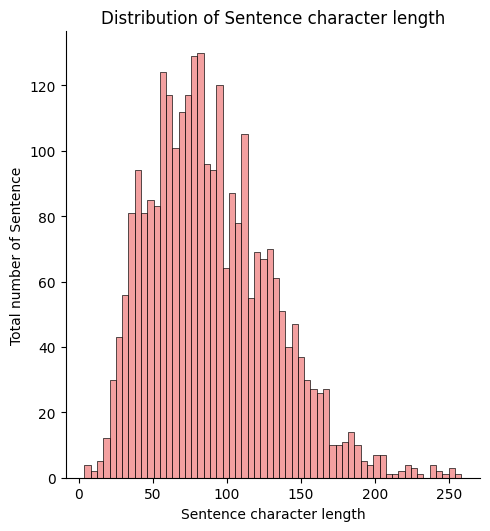

In [ ]:
# Visualizing 'reviews_lemmatized' character length
character_length = [len(each_sentence) for each_sentence in df['sentence_lemmatized']]

sns.displot(character_length, kind='hist', bins=60, color = 'lightcoral')
plt.xlabel("Sentence character length")
plt.ylabel("Total number of Sentence")
plt.title("Distribution of Sentence character length")
plt.show()

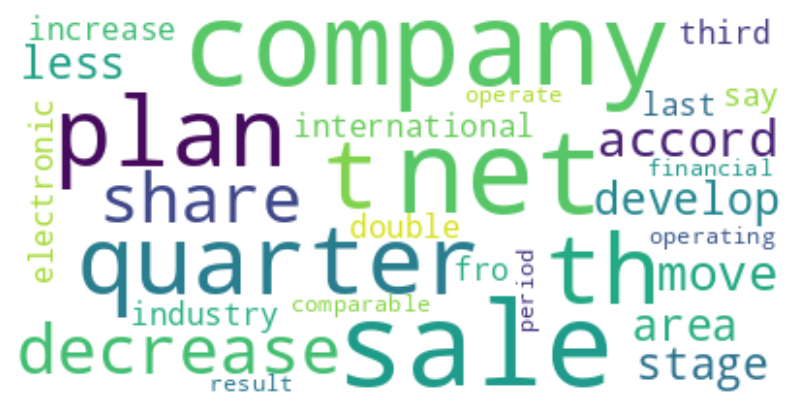

In [ ]:
stopwords_wordcloud = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=30,
                      background_color="white", random_state=42,
                      stopwords=stopwords_wordcloud).generate(str(df['sentence_lemmatized']))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Feature Extraction

TF-IDF Feature Extraction

In [ ]:
# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, max_df=0.95, stop_words='english', ngram_range=(1,2))

In [ ]:
X = tfidf.fit_transform(df['sentence_lemmatized'])

y= df['label_text']

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

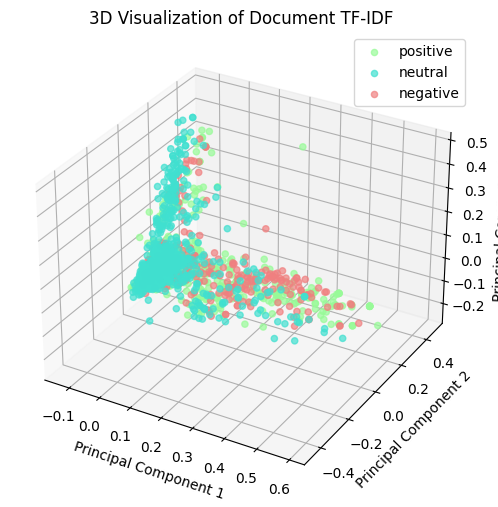

In [ ]:
# Initialize PCA with 3 components for 3D visualization
pca = PCA(n_components=3)

# Apply PCA to reduce the dimensionality to 3D
X_3d = pca.fit_transform(X.toarray())

# Define colors for each label
colors = {'neutral': 'turquoise', 'positive': 'palegreen', 'negative': 'lightcoral'}

# Plot the 3D data points
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for label in set(y):
    ax.scatter(X_3d[y == label, 0], X_3d[y == label, 1], X_3d[y == label, 2], label=label, color=colors[label], alpha=0.7)

ax.set_title('3D Visualization of Document TF-IDF')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

Train, test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (2068, 1122) (2068,)
Test shapes: (690, 1122) (690,)


Class Imbalance

In [ ]:
# Check the data to see if there is a class imbalance in the data
df['label_text'].value_counts(normalize=True)

neutral     0.593909
positive    0.281363
negative    0.124728
Name: label_text, dtype: float64

SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
counter = Counter(y_train)
print("Before handling imbalance", counter)

#oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print("After handling imbalance", counter)

Before handling imbalance Counter({'neutral': 1251, 'positive': 571, 'negative': 246})
After handling imbalance Counter({'neutral': 1251, 'positive': 1251, 'negative': 1251})


#MODEL BUILDING

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluation_scores(classifier, X_test, y_test):
    # Calculating Predicted value
    y_pred = classifier.predict(X_test)

    # Create confusion matrix
    conf_m = confusion_matrix(y_test, y_pred)

    # Define class labels
    class_labels = ['negative', 'neutral', 'positive']

    print("Visualizing the Confusion Matrix with a Heatmap")
    print("\n")
    print("*"*50)
    # Visualize Confusion Matrix with heatmap
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(conf_m,
                     annot=True,
                     cbar=False,
                     cmap="RdPu",
                     fmt='0.1f',
                     xticklabels=class_labels,
                     yticklabels=class_labels)
    plt.xlabel("Actual label")
    plt.ylabel("Predicted label")
    plt.show()
    print("*"*50)
    print("\n")

    # Calculating the values of True Positives, True Negatives, True Neutral,
    # False Positives, False Negatives, and False Neutral
    TP_positive = conf_m[2][2]  # Positive class
    TN_negative = conf_m[0][0]  # Negative class
    TN_neutral = conf_m[1][1]   # Neutral class
    FP_positive = conf_m[0][1] + conf_m[0][2]  # Negative misclassified as Positive
    FP_negative = conf_m[1][0] + conf_m[1][2]  # Neutral misclassified as Positive
    FN_positive = conf_m[2][0] + conf_m[2][1]  # Positive misclassified as Negative or Neutral
    FN_neutral = conf_m[1][0] + conf_m[1][2]  # Neutral misclassified as Negative or Positive

    print("Values of True Positives, True Negatives, True Neutral, False Positives, False Negatives, and False Neutral")
    print("~"*50)
    print('True Positives (Positive):', TP_positive)
    print('True Negatives (Negative):', TN_negative)
    print('True Neutral (Neutral):', TN_neutral)
    print('False Positives (Negative misclassified as Positive):', FP_positive)
    print('False Negatives (Positive misclassified as Negative or Neutral):', FN_positive)
    print('False Neutral (Neutral misclassified as Negative or Positive):', FN_neutral)
    print("~"*50)
    print("\n")

    # Calculating Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy, 2)

    # Calculating Sensitivity/Recall
    sensitivity_recall = (TP_positive / float(TP_positive + FN_positive))
    sensitivity_recall = round(sensitivity_recall, 2)

    # Calculating Specificity
    specificity = (TN_negative / float(TN_negative + FP_positive))
    specificity = round(specificity, 2)

    # Calculating Precision
    precision = (TP_positive / float(TP_positive + FP_positive))
    precision = round(precision, 2)

    # Calculating F_1 score
    F1_score = 2 * ((precision * sensitivity_recall) / (precision + sensitivity_recall))
    F1_score = round(F1_score, 2)

    print("Evaluation Score Summary")
    print('-'*50)
    print(f'Accuracy Score: {accuracy}')
    print(f'Sensitivity/Recall Score: {sensitivity_recall}')
    print(f'Specificity Score: {specificity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {F1_score}')
    print('-'*50)

    # Returning evaluation results for comparison later
    evaluation_metrics = []
    evaluation_metrics.append(accuracy)
    evaluation_metrics.append(sensitivity_recall)
    evaluation_metrics.append(specificity)
    evaluation_metrics.append(precision)
    evaluation_metrics.append(F1_score)

    return evaluation_metrics

#Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

Base Model

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, max_iter=34927816) #studentid:34927816

# Fit the classifier on the TF-IDF features
svm_classifier.fit(X_train_sm, y_train_sm)

SVC(kernel='linear', max_iter=34927816, probability=True)

Visualizing the Confusion Matrix with a Heatmap


**************************************************


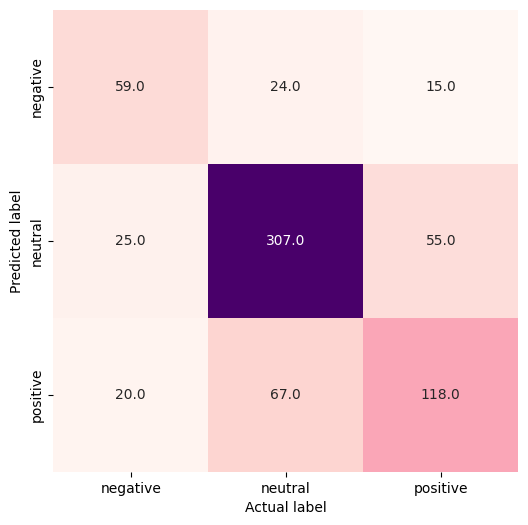

**************************************************


Values of True Positives, True Negatives, True Neutral, False Positives, False Negatives, and False Neutral
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives (Positive): 118
True Negatives (Negative): 59
True Neutral (Neutral): 307
False Positives (Negative misclassified as Positive): 39
False Negatives (Positive misclassified as Negative or Neutral): 87
False Neutral (Neutral misclassified as Negative or Positive): 80
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.7
Sensitivity/Recall Score: 0.58
Specificity Score: 0.6
Precision: 0.75
F1 Score: 0.65
--------------------------------------------------


In [ ]:
# Getting the score of the base model
svm_metrics = evaluation_scores(svm_classifier, X_test, y_test)

In [ ]:
# Printing the scores of the base model as reference
df_svm_metrics = pd.DataFrame({'Metrics': ['Accuracy Score','Sensitivity/Recall Score','Specificity Score','Precision','F1 Score'], 'SVM Base Model': svm_metrics},
                             columns = ['Metrics', 'SVM Base Model']
                             )
df_svm_metrics

,Metrics,SVM Base Model
0,Accuracy Score,0.70
1,Sensitivity/Recall Score,0.58
2,Specificity Score,0.60
3,Precision,0.75
4,F1 Score,0.65


HyperParameter Tuning

In [ ]:
svm_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                "solver": ["liblinear"]}

In [ ]:
svm_grid = {
    "C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "degree": [2, 3, 4],  # Only for polynomial kernel
    "gamma": ['scale', 'auto']  # Only for 'rbf', 'poly', and 'sigmoid' kernels
}

In [ ]:
svm_hpt = GridSearchCV(SVC(random_state=42),
                        param_grid=svm_grid,
                        cv=5,
                        verbose=True,
                        n_jobs=-1,
                        scoring='f1')

In [ ]:
# Fit random hyperparameter search model
svm_hpt.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=True)

In [ ]:
# Checking the best parameters
svm_hpt.best_params_

{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

HyperParameter Tuned Model

Visualizing the Confusion Matrix with a Heatmap


**************************************************


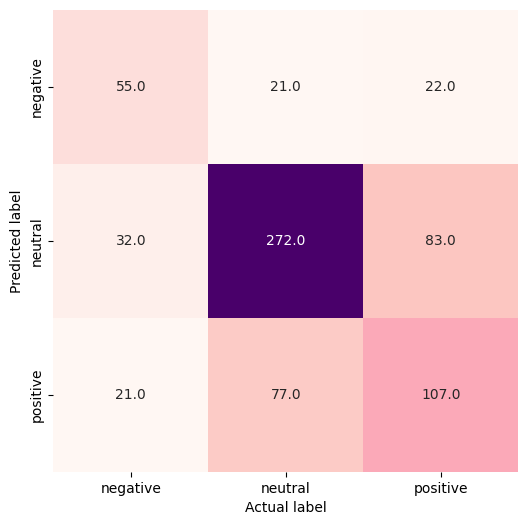

**************************************************


Values of True Positives, True Negatives, True Neutral, False Positives, False Negatives, and False Neutral
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives (Positive): 107
True Negatives (Negative): 55
True Neutral (Neutral): 272
False Positives (Negative misclassified as Positive): 43
False Negatives (Positive misclassified as Negative or Neutral): 98
False Neutral (Neutral misclassified as Negative or Positive): 115
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.63
Sensitivity/Recall Score: 0.52
Specificity Score: 0.56
Precision: 0.71
F1 Score: 0.6
--------------------------------------------------


In [ ]:
# Getting the scores of the tuned model
svm_tuned_metrics = evaluation_scores(svm_hpt, X_test, y_test)

In [ ]:
# Printing the scores of the base and tuned Logistic Regression model for reference
dict_svm_bt_metrics = {'Metrics': ['Accuracy Score','Sensitivity/Recall Score','Specificity Score','Precision','F1 Score'],
                               'SVM Base Model': svm_metrics,
                               'SVM Tuned Model': svm_tuned_metrics}

df_lr_bt_metrics = pd.DataFrame(dict_svm_bt_metrics, columns = ['Metrics', 'SVM Base Model', 'SVM Tuned Model'])
df_lr_bt_metrics

,Metrics,SVM Base Model,SVM Tuned Model
0,Accuracy Score,0.70,0.63
1,Sensitivity/Recall Score,0.58,0.52
2,Specificity Score,0.60,0.56
3,Precision,0.75,0.71
4,F1 Score,0.65,0.60


# Logistic Regression

Base Model

In [ ]:
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train_sm, y_train_sm)

Visualizing the Confusion Matrix with a Heatmap


**************************************************


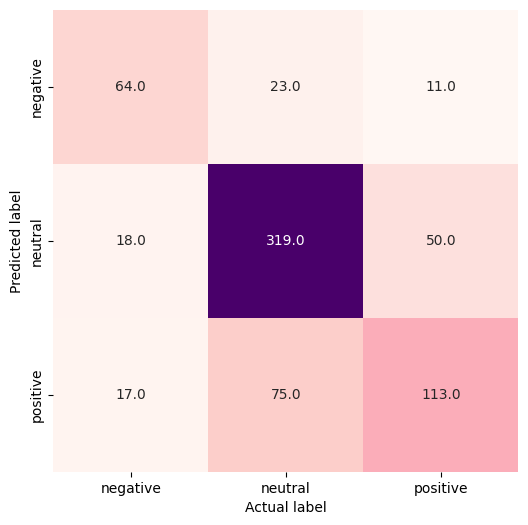

**************************************************


Values of True Positives, True Negatives, True Neutral, False Positives, False Negatives, and False Neutral
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives (Positive): 113
True Negatives (Negative): 64
True Neutral (Neutral): 319
False Positives (Negative misclassified as Positive): 34
False Negatives (Positive misclassified as Negative or Neutral): 92
False Neutral (Neutral misclassified as Negative or Positive): 68
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.72
Sensitivity/Recall Score: 0.55
Specificity Score: 0.65
Precision: 0.77
F1 Score: 0.64
--------------------------------------------------


In [ ]:
# Getting the score of the base model
lr_metrics = evaluation_scores(logreg, X_test, y_test)

In [ ]:
# Printing the scores of the base model as reference
df_lrb_metrics = pd.DataFrame({'Metrics': ['Accuracy Score','Sensitivity/Recall Score','Specificity Score','Precision','F1 Score'], 'Logistic Regression Base Model': lr_metrics},
                             columns = ['Metrics', 'Logistic Regression Base Model']
                             )
df_lrb_metrics

,Metrics,Logistic Regression Base Model
0,Accuracy Score,0.72
1,Sensitivity/Recall Score,0.55
2,Specificity Score,0.65
3,Precision,0.77
4,F1 Score,0.64


HyperParameter Tuning

In [ ]:
logreg_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                "solver": ["liblinear"]}

In [ ]:
# Setup grid hyperparameter search for LogisticRegression
logreg_hpt = GridSearchCV(LogisticRegression(random_state=42),
                                param_grid=logreg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
logreg_hpt.fit(X_train_sm, y_train_sm);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]



In [ ]:
# Checking the best parameters
logreg_hpt.best_params_

{'C': 100, 'solver': 'liblinear'}

HyperParameter Tuned Model

Visualizing the Confusion Matrix with a Heatmap


**************************************************


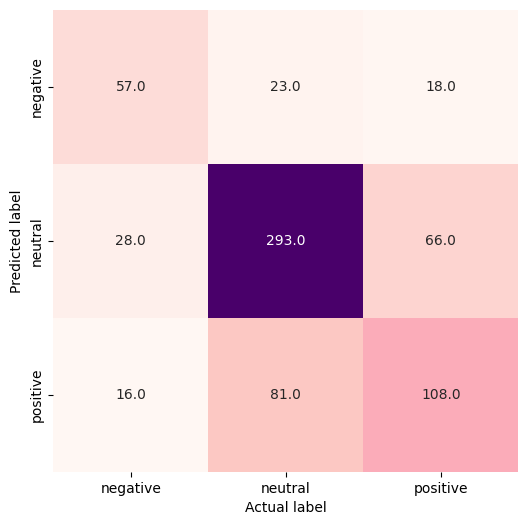

**************************************************


Values of True Positives, True Negatives, True Neutral, False Positives, False Negatives, and False Neutral
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives (Positive): 108
True Negatives (Negative): 57
True Neutral (Neutral): 293
False Positives (Negative misclassified as Positive): 41
False Negatives (Positive misclassified as Negative or Neutral): 97
False Neutral (Neutral misclassified as Negative or Positive): 94
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.66
Sensitivity/Recall Score: 0.53
Specificity Score: 0.58
Precision: 0.72
F1 Score: 0.61
--------------------------------------------------


In [ ]:
# Getting the scores of the tuned model
lr_tuned_metrics = evaluation_scores(logreg_hpt, X_test, y_test)

In [ ]:
# Printing the scores of the base and tuned Logistic Regression model for reference
dict_lr_bt_metrics = {'Metrics': ['Accuracy','Sensitivity/Recall','Specificity','Precision','F1 Score'],
                               'LR Base Model': lr_metrics,
                               'LR Tuned Model': lr_tuned_metrics}

df_lr_bt_metrics = pd.DataFrame(dict_lr_bt_metrics, columns = ['Metrics', 'LR Base Model', 'LR Tuned Model'])
df_lr_bt_metrics

,Metrics,LR Base Model,LR Tuned Model
0,Accuracy,0.72,0.66
1,Sensitivity/Recall,0.55,0.53
2,Specificity,0.65,0.58
3,Precision,0.77,0.72
4,F1 Score,0.64,0.61


Conclusion:

For Logistic Regression, Base Model is performing better than the tuned model.
We will consider the Base Model for evaluation purpose when we are doing model comparison.

#Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=42).fit(X_train_sm, y_train_sm)

Base Model

Visualizing the Confusion Matrix with a Heatmap


**************************************************


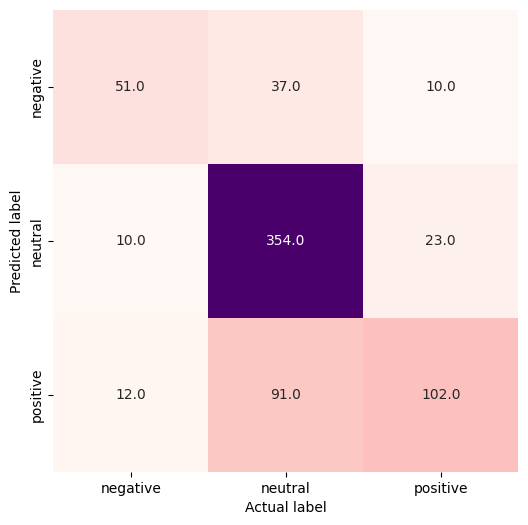

**************************************************


Values of True Positives, True Negatives, True Neutral, False Positives, False Negatives, and False Neutral
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives (Positive): 102
True Negatives (Negative): 51
True Neutral (Neutral): 354
False Positives (Negative misclassified as Positive): 47
False Negatives (Positive misclassified as Negative or Neutral): 103
False Neutral (Neutral misclassified as Negative or Positive): 33
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.73
Sensitivity/Recall Score: 0.5
Specificity Score: 0.52
Precision: 0.68
F1 Score: 0.58
--------------------------------------------------


In [ ]:
# Getting the score of the base model
rf_metrics = evaluation_scores(rf, X_test, y_test)

In [ ]:
# Printing the scores of the base model as reference
df_rfb_metrics = pd.DataFrame({'Metrics': ['Accuracy','Sensitivity/Recall','Specificity','Precision','F1 Score'], 'RF Base Model': rf_metrics},
                             columns = ['Metrics', 'RF Base Model']
                             )
df_rfb_metrics

,Metrics,RF Base Model
0,Accuracy,0.73
1,Sensitivity/Recall,0.50
2,Specificity,0.52
3,Precision,0.68
4,F1 Score,0.58


HyperParameter Tuning

In [ ]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": np.arange(10, 50, 5),
           "min_samples_split": np.arange(15, 500, 15),
           "min_samples_leaf": np.arange(5, 50, 5)}

In [ ]:
# Setup random hyperparameter search for Random Forest Classifier
rf_hpt = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                param_distributions=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
rf_hpt.fit(X_train_sm, y_train_sm);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]



In [ ]:
# Check best parameters
rf_hpt.best_params_

{'n_estimators': 810,
 'min_samples_split': 405,
 'min_samples_leaf': 35,
 'max_depth': 40}

In [ ]:
# Fine tuning using Grid Search CV
rf_grid = {"n_estimators": [510],
           "max_depth": [20],
           "min_samples_split": [350, 400],
           "min_samples_leaf": [45, 50]}

In [ ]:
# Setup random hyperparameter search for Random Forest Classifier
rf_hpt = GridSearchCV(RandomForestClassifier(random_state=42),
                                param_grid=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
rf_hpt.fit(X_train_sm, y_train_sm);

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan]



Visualizing the Confusion Matrix with a Heatmap


**************************************************


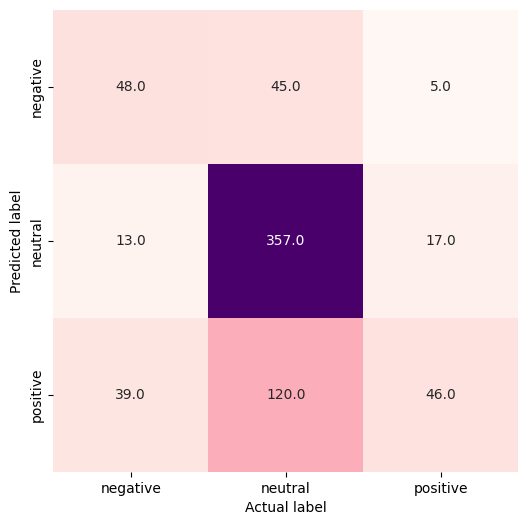

**************************************************


Values of True Positives, True Negatives, True Neutral, False Positives, False Negatives, and False Neutral
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives (Positive): 46
True Negatives (Negative): 48
True Neutral (Neutral): 357
False Positives (Negative misclassified as Positive): 50
False Negatives (Positive misclassified as Negative or Neutral): 159
False Neutral (Neutral misclassified as Negative or Positive): 30
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.65
Sensitivity/Recall Score: 0.22
Specificity Score: 0.49
Precision: 0.48
F1 Score: 0.3
--------------------------------------------------


In [ ]:
# Getting the scores of the tuned model
rf_tuned_metrics = evaluation_scores(rf_hpt, X_test, y_test)

In [ ]:
# Printing the scores of the base and tuned Random Forest model as reference
dict_rf_bt_metrics = {'Metrics': ['Accuracy','Sensitivity/Recall','Specificity','Precision','F1 Score'],
                               'RF Base Model': rf_metrics,
                               'RF Tuned Model': rf_tuned_metrics}

df_rf_bt_metrics = pd.DataFrame(dict_rf_bt_metrics, columns = ['Metrics', 'RF Base Model', 'RF Tuned Model'])
df_rf_bt_metrics

,Metrics,RF Base Model,RF Tuned Model
0,Accuracy,0.73,0.65
1,Sensitivity/Recall,0.50,0.22
2,Specificity,0.52,0.49
3,Precision,0.68,0.48
4,F1 Score,0.58,0.30


#Model Evaluation

In [ ]:
# Printing the scores of all the 2 Models (Base and Tuned)
dict_bt_metrics = {'Metrics': ['Accuracy','Sensitivity/Recall','Specificity','Precision','F1 Score'],
                              'SVM Base Model': svm_metrics, 'SVM Tuned Model': svm_tuned_metrics,
                              'LR Base Model': lr_metrics, 'LR Tuned Model': lr_tuned_metrics,
                              'RF Base Model': rf_metrics, 'RF Tuned Model': rf_tuned_metrics}

df_bt_metrics = pd.DataFrame(dict_bt_metrics, columns = ['Metrics', 'SVM Base Model', 'SVM Tuned Model', 'LR Base Model', 'LR Tuned Model', 'RF Base Model', 'RF Tuned Model'])
df_bt_metrics

,Metrics,SVM Base Model,SVM Tuned Model,LR Base Model,LR Tuned Model,RF Base Model,RF Tuned Model
0,Accuracy,0.70,0.63,0.72,0.66,0.73,0.65
1,Sensitivity/Recall,0.58,0.52,0.55,0.53,0.50,0.22
2,Specificity,0.60,0.56,0.65,0.58,0.52,0.49
3,Precision,0.75,0.71,0.77,0.72,0.68,0.48
4,F1 Score,0.65,0.60,0.64,0.61,0.58,0.30


#FEATURE IMPORTANCE

Using RF based Model to extract words' importance

In [ ]:
predicted_rf = rf.predict(X_train)

In [ ]:
def extract_feature_importance(classifier, feature_names):
    feature_importance_dict = {}
    for feature_name, importance_score in zip(feature_names, classifier.feature_importances_):
        feature_importance_dict[feature_name] = importance_score
    return feature_importance_dict

# Get feature names from TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Extract feature importance dictionary for train data
train_feature_importance = extract_feature_importance(rf, feature_names)

In [ ]:
def extract_feature_importance(classifier, feature_names):
    # Initialize dictionary to store feature importance scores
    class_feature_importance = {}

    # Check if the classifier has multiple classes
    if hasattr(classifier, 'n_classes_') and classifier.n_classes_ > 1:
        # Iterate through feature names and importance scores
        for feature_name, importance_score in zip(feature_names, classifier.feature_importances_):
            class_feature_importance[feature_name] = importance_score
    else:
        # If the classifier has only one class, store the importance scores for that class
        label = 'positive'  # Assuming positive class
        for feature_name, importance_score in zip(feature_names, classifier.feature_importances_):
            class_feature_importance[feature_name] = importance_score

    return class_feature_importance

# Assuming 'rf' is your trained Random Forest classifier
# Assuming 'tfidf' is the TF-IDF vectorizer used for feature extraction

# Get feature names from TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Extract feature importance dictionary for each class
class_feature_importance = extract_feature_importance(rf, feature_names)

# Print or use this dictionary as needed

In [ ]:
def extract_feature_importance(classifier, feature_names, vectorizer):
    # Initialize a dictionary to store feature importance scores for each word
    feature_importance_dict = {}

    # Transform feature names into numerical feature vectors
    feature_vectors = vectorizer.transform(feature_names)

    # Predict class labels for each feature vector
    predicted_labels = classifier.predict(feature_vectors)

    # Iterate through feature names, predicted labels, and importance scores
    for feature_name, label, importance_score in zip(feature_names, predicted_labels, classifier.feature_importances_):
        # Store the importance score for each word along with its sentiment classification
        feature_importance_dict[feature_name] = {
            'importance_score': importance_score,
            'sentiment': label
        }

    return feature_importance_dict

# Assuming 'rf' is your trained Random Forest classifier
# Assuming 'tfidf' is the TF-IDF vectorizer used for feature extraction

# Get feature names from TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Extract feature importance dictionary for each class
feature_importance_dict = extract_feature_importance(rf, feature_names, tfidf)

# Print or use this dictionary as needed

In [ ]:
# Convert the dictionary to a DataFrame
df_feature_importance = pd.DataFrame.from_dict(feature_importance_dict, orient='index', columns=['importance_score', 'sentiment'])

# Reset index to make 'feature_words' a column
df_feature_importance.reset_index(inplace=True)
df_feature_importance.rename(columns={'index': 'feature_words'}, inplace=True)

# Display the DataFrame
print(df_feature_importance)

     feature_words  importance_score sentiment
0             able          0.001849  positive
1           abroad          0.000477   neutral
2           access          0.000108   neutral
3        accessory          0.000052   neutral
4           accord          0.001323   neutral
...            ...               ...       ...
1117      year ago          0.000408   neutral
1118    year early          0.002696  positive
1119     yesterday          0.000340   neutral
1120          zinc          0.000522   neutral
1121          zone          0.000068   neutral

[1122 rows x 3 columns]


In [ ]:
df_feature_importance

,feature_words,importance_score,sentiment
0,able,0.001849,positive
1,abroad,0.000477,neutral
2,access,0.000108,neutral
3,accessory,0.000052,neutral
4,accord,0.001323,neutral
...,...,...,...
1117,year ago,0.000408,neutral
1118,year early,0.002696,positive
1119,yesterday,0.000340,neutral
1120,zinc,0.000522,neutral


In [ ]:
df_feature_importance.to_csv('df_feature_importance.csv',
                        encoding = 'utf-8-sig')

files.download('df_feature_importance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

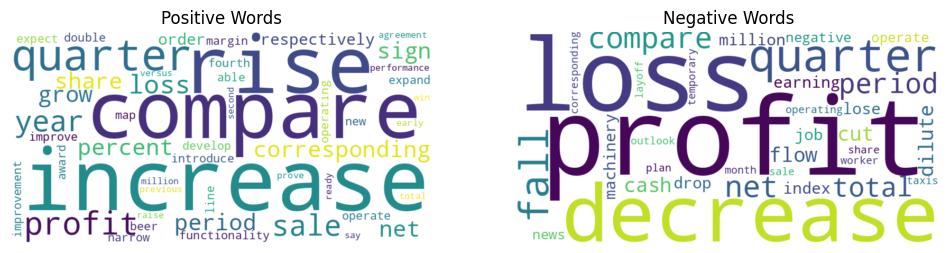

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter DataFrame for positive and negative sentiments
positive_words = df_feature_importance[df_feature_importance['sentiment'] == 'positive']['feature_words']
negative_words = df_feature_importance[df_feature_importance['sentiment'] == 'negative']['feature_words']

# Convert Series to string
positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)

# Create WordCloud objects
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot WordClouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')

plt.show()

Code for preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from spacy.lang.en import English

nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')

# Load English tokenizer, tagger, parser, and NER
nlp = English()

def preprocess_sentence(sentence):
    stopwords_set = set(stopwords.words("english"))
    common_words = set(words.words())

    def clean_punctuation(sentence):
        sentence = sentence.lower() # Text to lowercase
        pattern = '[^\w\s]' # Removing punctuation
        sentence = re.sub(pattern, '', sentence)
        return sentence

    def clean_stopwords(sentence):
        sentence = sentence.lower() # Text to lowercase
        words = word_tokenize(sentence) # Split sentences into words
        text_nostopwords = " ".join([each_word for each_word in words if each_word not in stopwords_set])
        return text_nostopwords

    def clean_lemma(text):
        sentence = []
        doc = nlp(text)
        for token in doc:
            sentence.append(token.lemma_)
        return " ".join(sentence)

    def remove_rare_words(text):
        return ' '.join([word for word in text.split() if word.lower() in common_words])

    def spell_check(text):
        english_words = set(words.words())
        corrected_text = []
        for word in text.split():
            if word.lower() not in english_words:
                closest_word = min(english_words, key=lambda x: nltk.edit_distance(word.lower(), x))
                corrected_text.append(closest_word)
            else:
                corrected_text.append(word)
        return ' '.join(corrected_text)

    def remove_single_letter_words(text):
        return ' '.join([word for word in text.split() if len(word) > 1])

    # Apply preprocessing steps
    sentence = clean_punctuation(sentence)
    sentence = clean_stopwords(sentence)
    sentence = clean_lemma(sentence)
    sentence = remove_rare_words(sentence)
    sentence = spell_check(sentence)
    sentence = remove_single_letter_words(sentence)

    return sentence

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#SENTIMENT SCORE

In [ ]:
def measure_sentiment_index(sentence, classifier, vectorizer):
    # Transform the sentence into numerical features using the vectorizer
    sentence_features = vectorizer.transform([sentence])

    # Predict probabilities for each class
    probabilities = classifier.predict_proba(sentence_features)[0]

    # Calculate measurable index for each sentiment class
    positive_index = probabilities[classifier.classes_ == 'positive']
    negative_index = probabilities[classifier.classes_ == 'negative']
    neutral_index = probabilities[classifier.classes_ == 'neutral']

    # Optionally normalize the index values

    # Return the sentiment index values
    return positive_index, negative_index, neutral_index

Test for single text

In [ ]:
# Example usage/ sentence:
sentence = "the acquisition of kaupthing sverige will bring a significant positive to the group performance"
positive_index, negative_index, neutral_index = measure_sentiment_index(sentence, rf, tfidf)

print("Positive Index:", positive_index)
print("Negative Index:", negative_index)
print("Neutral Index:", neutral_index)

Positive Index: [0.72]
Negative Index: [0.09]
Neutral Index: [0.19]


Test for original dataset

In [ ]:
# Iterate over sentences in the original DataFrame and compute sentiment index
sentences = df['sentence']
sentiment_indexes = []

for sentence in sentences:
    positive_index, negative_index, neutral_index = measure_sentiment_index(sentence, rf, tfidf)
    sentiment_indexes.append({
        'positive_index': positive_index,
        'negative_index': negative_index,
        'neutral_index': neutral_index
    })

                                               sentence label_text  \
0     according to gran  the company has no plans to...    neutral   
1     technopolis plans to develop in stages an area...    neutral   
2     the international electronic industry company ...   negative   
3     for the last quarter of 2010  componenta s net...   positive   
4     in the third quarter of 2010  net sales increa...   positive   
...                                                 ...        ...   
2753  the company said that its comparable operating...   negative   
2754  operating result for the 12month period decrea...   negative   
2755  helsinki thomson financial  shares in cargotec...   negative   
2756  london marketwatch  share prices ended lower i...   negative   
2757  net sales of the paper segment decreased to eu...   negative   

     positive_index        negative_index         neutral_index  
0            [0.19]                [0.02]                [0.79]  
1            [0.35]        

In [ ]:
# Convert the list of sentiment indexes into a DataFrame
sentiment_index_df = pd.DataFrame(sentiment_indexes)

# Select columns 'sentence' and 'label_text' from the original DataFrame
selected_columns_df = df[['sentence', 'label_text']]

# Concatenate the selected columns DataFrame with the sentiment index DataFrame
df_with_sentiment_index = pd.concat([selected_columns_df, sentiment_index_df], axis=1)

# Display the DataFrame with sentiment index
df_with_sentiment_index

,sentence,label_text,positive_index,negative_index,neutral_index
0,according to gran the company has no plans to...,neutral,[0.19],[0.02],[0.79]
1,technopolis plans to develop in stages an area...,neutral,[0.35],[0.0],[0.65]
2,the international electronic industry company ...,negative,[0.34],[0.16],[0.5]
3,for the last quarter of 2010 componenta s net...,positive,[0.5],[0.37],[0.13]
4,in the third quarter of 2010 net sales increa...,positive,[0.42],[0.42],[0.16]
...,...,...,...,...,...
2753,the company said that its comparable operating...,negative,[0.6],[0.38],[0.02]
2754,operating result for the 12month period decrea...,negative,[0.38],[0.36],[0.26]
2755,helsinki thomson financial shares in cargotec...,negative,[0.05],[0.5483333333333333],[0.4016666666666666]
2756,london marketwatch share prices ended lower i...,negative,[0.04],[0.32],[0.64]


In [ ]:
df_with_sentiment_index.to_csv('df_with_sentiment_index.csv',
                        encoding = 'utf-8-sig')

files.download('df_with_sentiment_index.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>